In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
housing_data = pd.read_csv("housing_dataset.csv")
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


About Dataset:

**longitude:** A measure of how far west a house is; a higher value is farther west

**latitude:** A measure of how far north a house is; a higher value is farther north

**housingMedianAge:** Median age of a house within a block; a lower number is a newer building

**totalRooms:** Total number of rooms within a block

**totalBedrooms:** Total number of bedrooms within a block

**population:** Total number of people residing within a block

**households:** Total number of households, a group of people residing within a home unit, for a block

**medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars)

**medianHouseValue:** Median house value for households within a block (measured in US Dollars)

**oceanProximity:** Location of the house w.r.t ocean/sea

In [5]:
housing_data.shape

(20640, 10)

In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


There are total 20,640 instance in the dataset  

total_bedrooms has 20,433 only, the rest 207 is null values

ocean_proximity is categorical variable

**Missing Values**

In [7]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Statistical Information**

In [7]:
housing_data.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640,20640.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136,NaN
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,NaN,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,NaN,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,NaN,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,NaN,264725.000000


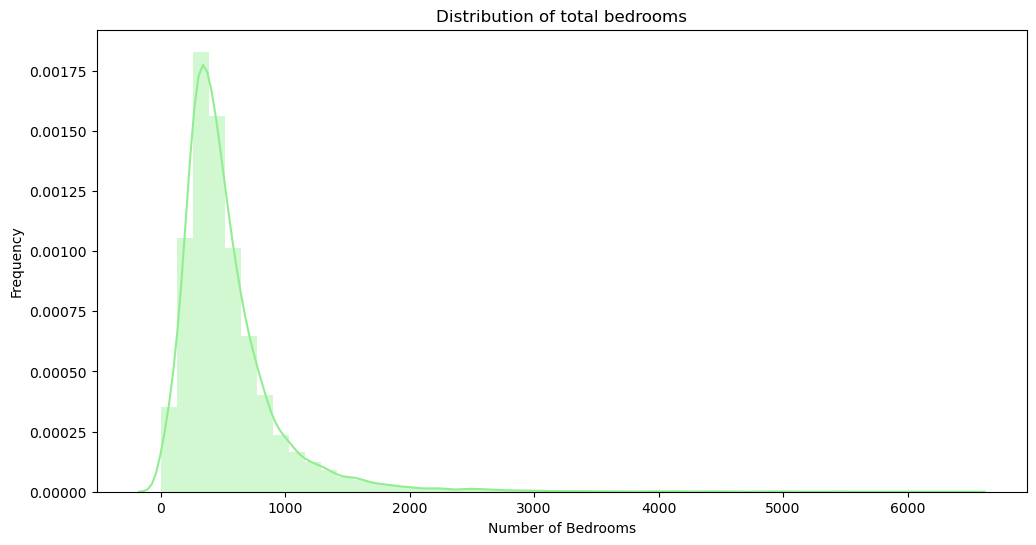

In [8]:
plt.figure(figsize = (12,6))
sns.distplot(x = housing_data['total_bedrooms'], color = 'lightgreen')
plt.title('Distribution of total bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

total_bedrooms is positively skewed, thus we will use the median to fill null values because it works best for skewed distributions and the mean is sensitive to data skewness.

In [9]:
housing_data['total_bedrooms'].fillna(value = housing_data['total_bedrooms'].median(), inplace = True)

In [10]:
housing_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

No more null values in total_bedrooms.

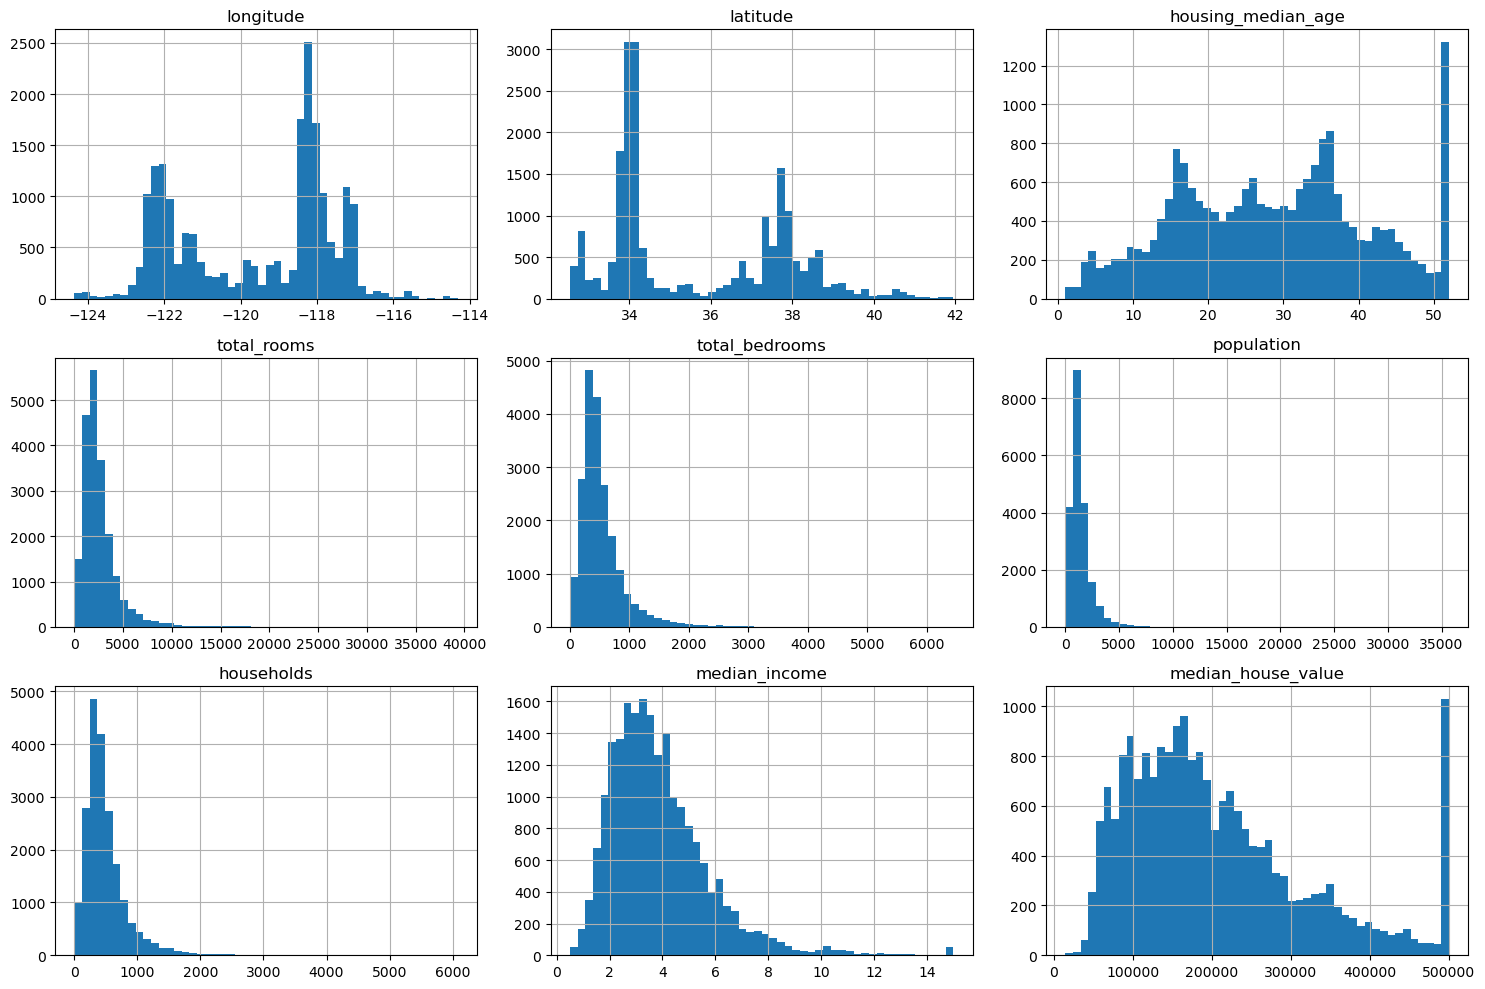

In [11]:
housing_data.hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

The median age of houses is mostly between 15 to 37 years.

**Distribution of Median Income**

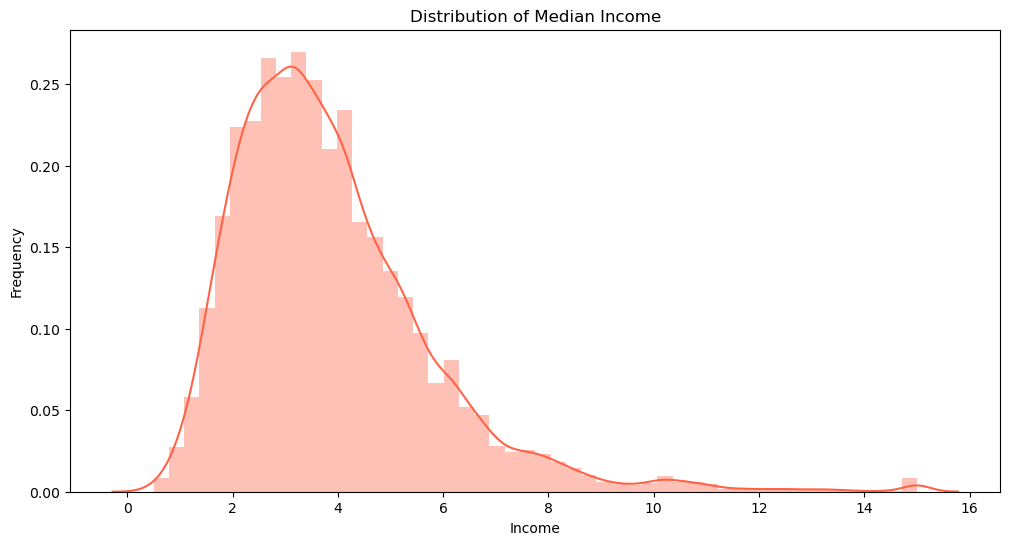

In [12]:
plt.figure(figsize = (12,6))
sns.distplot(x = housing_data['median_income'], color = 'tomato')
plt.title('Distribution of Median Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

It's a positively skewed distribution. The plot demonstrates that the majority of people have income within the same range, with only a few who are on the further side.

**Categorical Variable: Ocean Proximity**

Text(0.5, 1.0, 'Ocean Proximity Bar Plot')

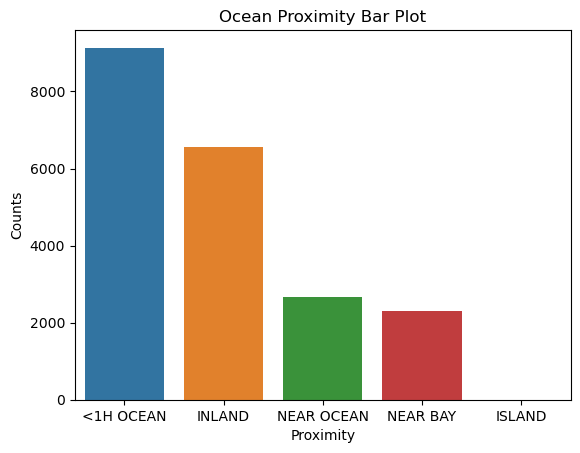

In [13]:
ocean_proximity = housing_data['ocean_proximity'].value_counts()
sns.barplot(x=ocean_proximity.index, y=ocean_proximity.values)

plt.xlabel('Proximity')
plt.ylabel('Counts')
plt.title('Ocean Proximity Bar Plot')

Five unique values are present in ocean_proximity variable.

**Plotting Median house value vs Median Income**

Text(0.5, 0, 'Median Income')

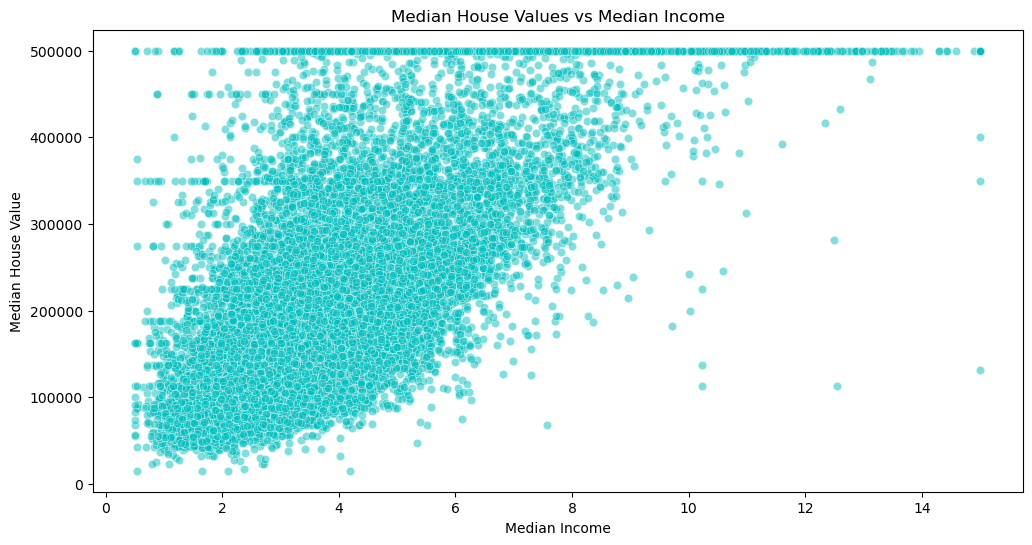

In [14]:
plt.figure(figsize = (12,6))
plt.title("Median House Values vs Median Income")
sns.scatterplot(data = housing_data, y = 'median_house_value', x = 'median_income', alpha = 0.5, color = 'c')
plt.ylabel("Median House Value")
plt.xlabel("Median Income")

We can see that the maximum house value was clearly fixed at $500,000, and any houses more expensive than that received this sum. These records should be removed because they contain an incorrect target value and could affect the algorithm.

There are horizontal lines at specific positions, including 450000, 350000, and 275000. It looks very unnatural, and these values were probably misplaced.

**Correlation Matrix and Heatmap**

In [48]:
data = pd.get_dummies(housing_data, columns=['ocean_proximity'], drop_first=True,)
housing_data2=data.iloc[:,:-1]
housing_data2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,False,False,True
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,False,False,True
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,False,False,True
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,False,False,True
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,False,False,True


<Axes: >

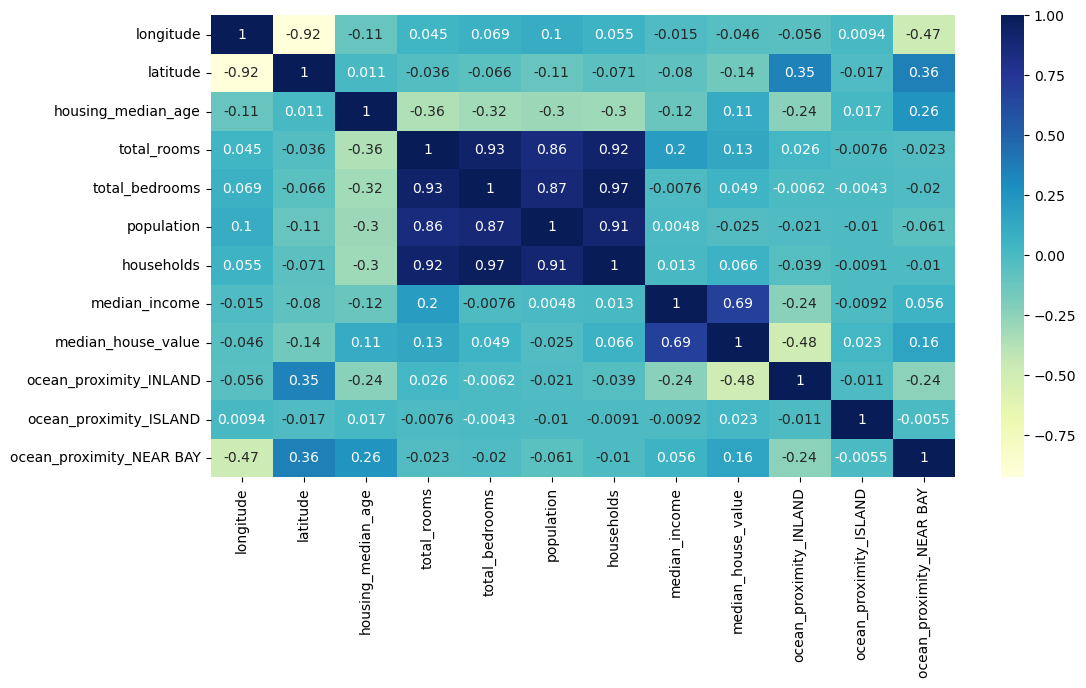

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(housing_data2.corr(), annot=True, cmap="YlGnBu")

**Removing horizontal lines at specific positions**

In [50]:
data = housing_data[~housing_data['median_house_value'].isin([450000, 350000, 275000, 500000, 500001])].reset_index(drop=True)

Text(0.5, 0, 'Median Income')

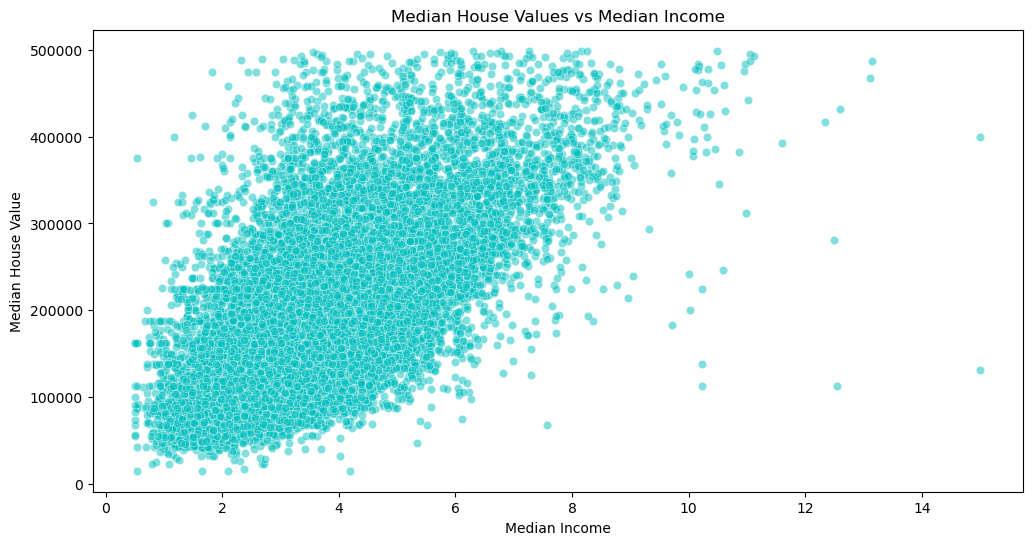

In [51]:
plt.figure(figsize = (12,6))
plt.title("Median House Values vs Median Income")
sns.scatterplot(data = data, y = 'median_house_value', x = 'median_income', alpha = 0.5, color = 'c')
plt.ylabel("Median House Value")
plt.xlabel("Median Income")

**Ocean Proximity vs Median house value**

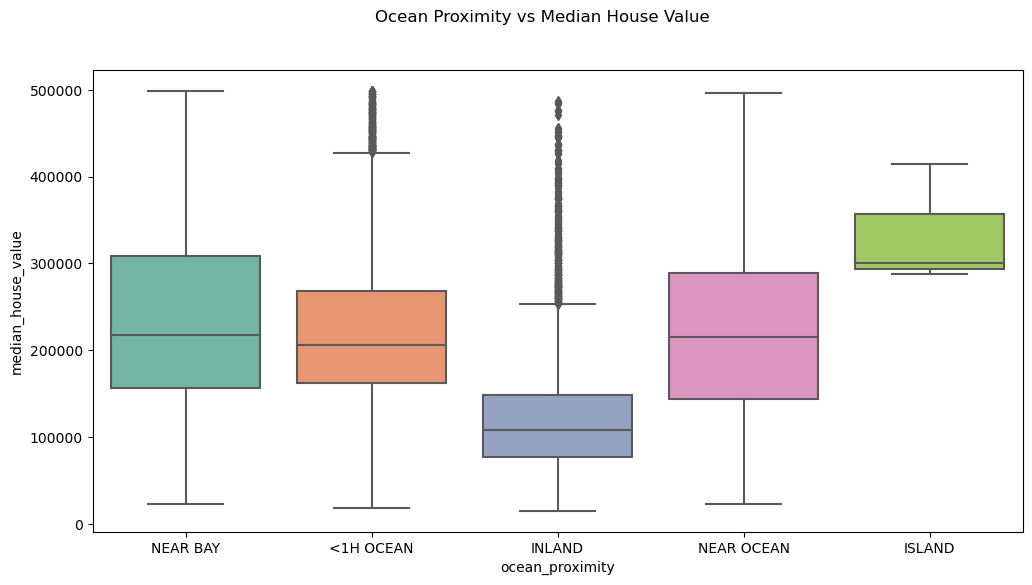

In [22]:
plt.figure(figsize = (12,6))

# Set the main title
plt.suptitle('Ocean Proximity vs Median House Value')

# Box plot
sns.boxplot(data=data, x="ocean_proximity", y="median_house_value", palette="Set2")

# Show the plot
plt.show()

Houses in the "near_bay", "near_ocean", and "<1H ocean" categories are more expensive than those in the inland. Furthermore, these categories have a wider range of prices.

**Extracting useful features from the present variables**

In [23]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_household"] = data["total_bedrooms"]/data["households"]
data["population_per_household"] = data["population"]/data["households"]

In [24]:
data[['rooms_per_household', 'bedrooms_per_household', 'population_per_household']].describe()

,rooms_per_household,bedrooms_per_household,population_per_household
count,19467.000000,19467.000000,19467.000000
mean,5.369148,1.100794,3.075856
std,2.294042,0.503145,10.070866
min,0.846154,0.121204,0.692308
25%,4.426481,1.005256,2.451096
50%,5.191993,1.048421,2.840741
75%,5.973212,1.099665,3.307692
max,132.533333,34.066667,1243.333333


In [52]:
data = data.drop(['total_rooms','total_bedrooms','population', 'households'], axis = 1)
data.head()

,longitude,latitude,housing_median_age,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,3.8462,NEAR BAY,342200


As the 'ISLAND' in ocean proximity has little instances, we are dropping it from dataset.

In [53]:
data = data.loc[data['ocean_proximity'] != 'ISLAND'].reset_index(drop=True)

In [54]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8505
INLAND        6511
NEAR OCEAN    2406
NEAR BAY      2042
Name: count, dtype: int64

**Encoding Categorical Variable - Ocean Proximity**

In [55]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# Perform one-hot encoding
encoded_data = encoder.fit_transform(data[['ocean_proximity']]).toarray()

# Convert encoded data to DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Join the encoded columns with the original DataFrame
final_data = data.join(encoded_df)

# Reset the index
final_data.reset_index(drop=True, inplace=True)

In [56]:
final_data = final_data.drop(['ocean_proximity'], axis = 1)

In [57]:
final_data.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,8.3252,452600,0.0,0.0,1.0,0.0
1,-122.22,37.86,21,8.3014,358500,0.0,0.0,1.0,0.0
2,-122.24,37.85,52,7.2574,352100,0.0,0.0,1.0,0.0
3,-122.25,37.85,52,5.6431,341300,0.0,0.0,1.0,0.0
4,-122.25,37.85,52,3.8462,342200,0.0,0.0,1.0,0.0


Data is ready to be split into train and test to train our models.